In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: For display aesthetics
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [8]:
# Load Zillow datasets from the datasets/ folder
zhvi = pd.read_csv("datasets/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
zori = pd.read_csv("datasets/Metro_zori_uc_sfrcondomfr_sm_month.csv")

In [9]:
# Peek at structure
print("ZHVI shape:", zhvi.shape)
print("ZORI shape:", zori.shape)

# Check column names and sample data
print("ZHVI columns:", zhvi.columns[:10])
zhvi.head()


ZHVI shape: (895, 310)
ZORI shape: (654, 130)
ZHVI columns: Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31'],
      dtype='object')


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31
0,102001,0,United States,country,NaN,124341.46,124560.21,124831.50,125413.37,126083.02,...,366082.53,366541.03,367139.89,367641.58,368374.19,369014.89,369482.29,369202.39,368665.57,367968.71
1,394913,1,"New York, NY",msa,NY,222144.73,223088.72,224041.45,225972.06,227971.27,...,684259.38,688392.14,692009.20,694852.80,696684.02,697783.97,699099.87,700827.95,703306.78,705107.63
2,753899,2,"Los Angeles, CA",msa,CA,227474.67,228321.16,229448.69,231692.08,234145.64,...,968498.30,975119.78,980502.55,985140.37,989285.87,989838.11,987754.66,982522.49,978090.51,973190.30
3,394463,3,"Chicago, IL",msa,IL,157959.15,158105.37,158383.86,159076.66,159910.02,...,332736.33,333770.64,334778.58,335849.14,337135.02,338519.80,339906.12,340776.96,341395.61,341694.77
4,394514,4,"Dallas, TX",msa,TX,130592.69,130650.86,130717.73,130891.38,131120.33,...,385874.03,385669.19,385559.56,385261.05,384718.56,384177.31,383371.62,381834.22,379657.81,377185.67


In [11]:
# Convert wide to long format
zhvi_long = zhvi.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'],
                      var_name='Date', value_name='HomeValue')
zori_long = zori.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'],
                      var_name='Date', value_name='Rent')

# Convert Date columns to datetime
zhvi_long['Date'] = pd.to_datetime(zhvi_long['Date'])
zori_long['Date'] = pd.to_datetime(zori_long['Date'])


In [12]:
# Merge on RegionName and Date for comparison
merged = pd.merge(zhvi_long, zori_long[['RegionName', 'Date', 'Rent']],
                  on=['RegionName', 'Date'], how='inner')

# Optional: Filter for most recent date
latest = merged[merged['Date'] == merged['Date'].max()]
latest.sort_values(by='HomeValue', ascending=False).head(10)


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,HomeValue,Rent
79519,395059,36,"San Jose, CA",msa,CA,2025-05-31,1649984.88,3476.73
80088,394713,768,"Jackson, WY",msa,WY,2025-05-31,1368784.95,4003.44
79998,394556,566,"Edwards, CO",msa,CO,2025-05-31,1289494.99,3863.88
79496,395057,12,"San Francisco, CA",msa,CA,2025-05-31,1165757.23,3159.92
79663,395065,183,"Santa Cruz, CA",msa,CA,2025-05-31,1159942.11,3813.06
79924,394674,467,"Heber, UT",msa,UT,2025-05-31,1144602.38,3318.53
80115,753921,867,"Steamboat Springs, CO",msa,CO,2025-05-31,1111948.43,3659.67
79743,394731,267,"Kahului, HI",msa,HI,2025-05-31,1053834.73,3588.39
79932,394736,478,"Kapaa, HI",msa,HI,2025-05-31,1010578.92,5183.33
80101,753871,811,"Breckenridge, CO",msa,CO,2025-05-31,996092.54,3514.63


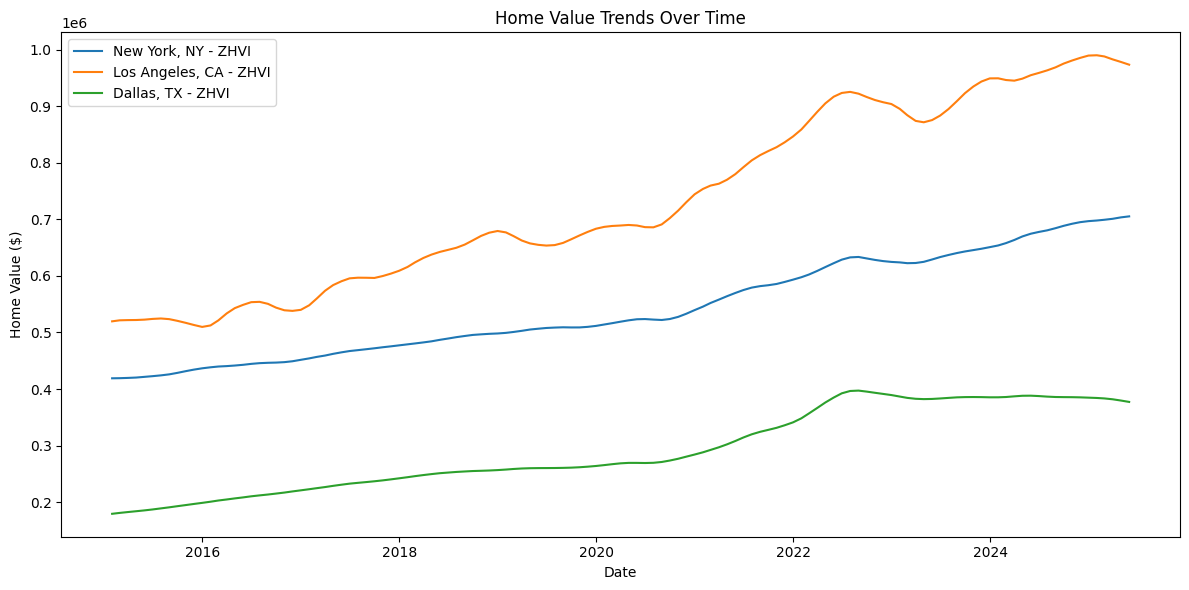

In [13]:
metros = ['New York, NY', 'Los Angeles, CA', 'Dallas, TX']

plt.figure(figsize=(12,6))
for metro in metros:
    subset = merged[merged['RegionName'] == metro]
    plt.plot(subset['Date'], subset['HomeValue'], label=f'{metro} - ZHVI')

plt.legend()
plt.title("Home Value Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Home Value ($)")
plt.tight_layout()
plt.show()

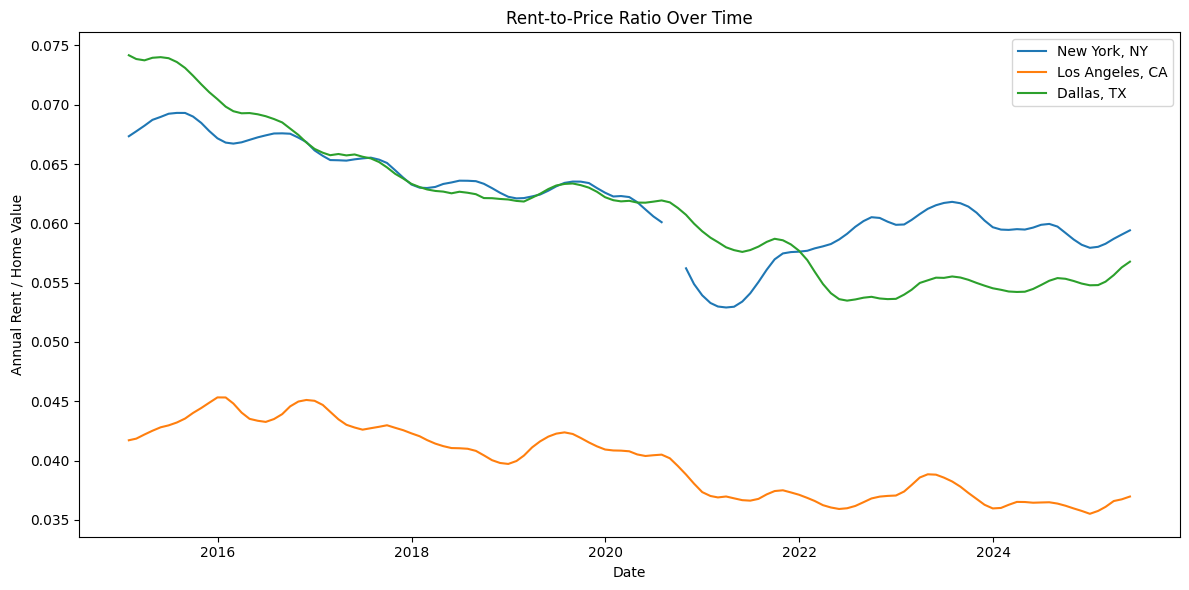

In [14]:
merged['RentToPrice'] = (merged['Rent'] * 12) / merged['HomeValue']

plt.figure(figsize=(12,6))
for metro in metros:
    subset = merged[merged['RegionName'] == metro]
    plt.plot(subset['Date'], subset['RentToPrice'], label=metro)

plt.legend()
plt.title("Rent-to-Price Ratio Over Time")
plt.xlabel("Date")
plt.ylabel("Annual Rent / Home Value")
plt.tight_layout()
plt.show()

In [ ]:
# Rent-to-price ratio (annualized)
merged['RentToPrice'] = (merged['Rent'] * 12) / merged['HomeValue']

# Year-over-year price appreciation
merged['ZHVI YoY %'] = merged.groupby('RegionName')['HomeValue'].pct_change(periods=12) * 100

# Optional: YoY Rent change
merged['Rent YoY %'] = merged.groupby('RegionName')['Rent'].pct_change(periods=12) * 100

C:\Users\gtall\AppData\Local\Temp\ipykernel_19328\465330189.py:5: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  merged['ZHVI YoY %'] = merged.groupby('RegionName')['HomeValue'].pct_change(periods=12) * 100
C:\Users\gtall\AppData\Local\Temp\ipykernel_19328\465330189.py:8: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  merged['Rent YoY %'] = merged.groupby('RegionName')['Rent'].pct_change(periods=12) * 100


: 